# Practica 8

In [1]:
# Dependencias

import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Ejercicio 1

In [2]:
# Preparacion de Data

tortugas = pd.DataFrame()

tortugas["longitud"] = [93,94,96,101,102,103,104,106]
tortugas["ancho"] = [76,78,80,84,85,82,83,83]

tortugas

,longitud,ancho
0,93,76
1,94,78
2,96,80
3,101,84
4,102,85
5,103,82
6,104,83
7,106,83


### a

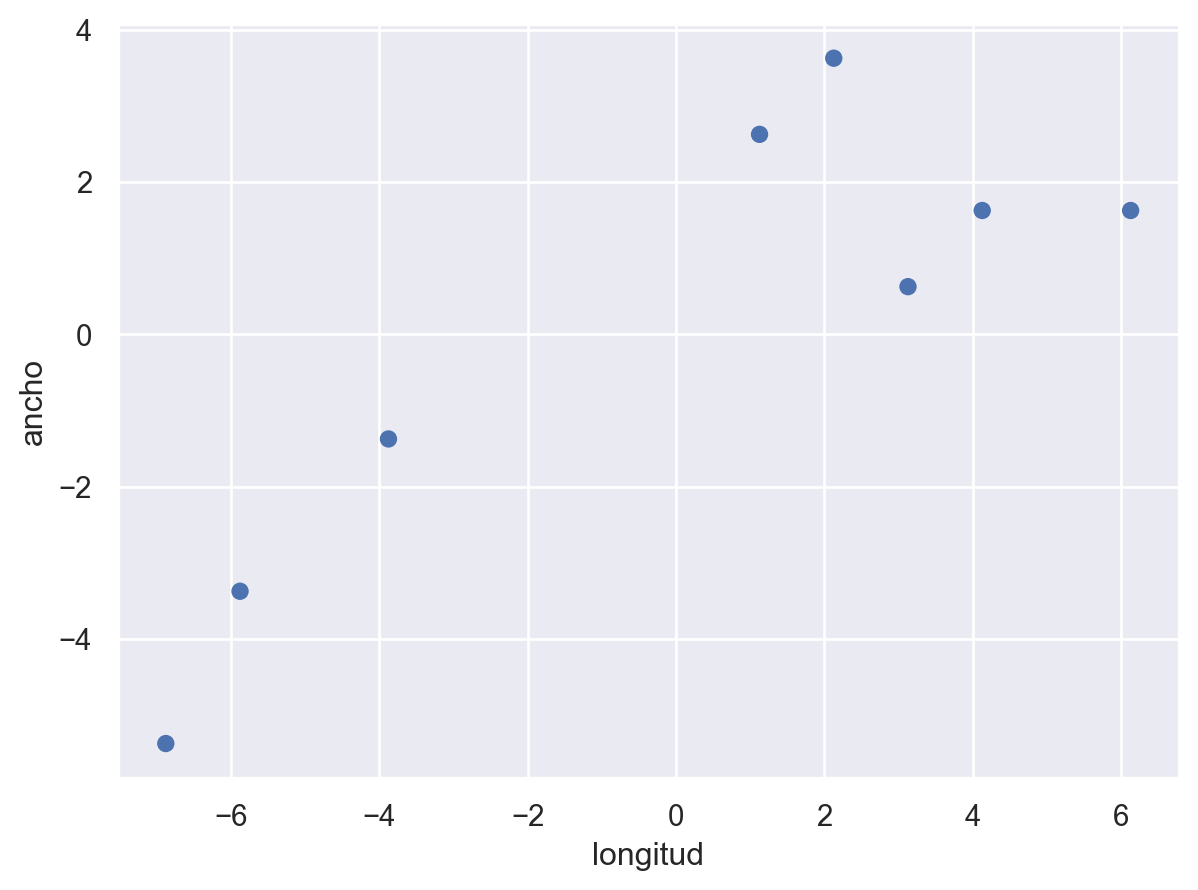

In [3]:
#Calculo de Medias
mediaLongitud = tortugas["longitud"].mean()
mediaAncho = tortugas["ancho"].mean()

#Calculo de Tortugas Estrella
starTortugas = pd.DataFrame()

starTortugas["longitud"] = tortugas["longitud"] - mediaLongitud
starTortugas["ancho"] = tortugas["ancho"] - mediaAncho

so.Plot(data=starTortugas, x = "longitud", y = "ancho").add(so.Dot())

### b

In [4]:
#Calculo Matriz Covarianza
covarianzaTortugas = pd.DataFrame()

covarianzaTortugas = (starTortugas.transpose()@starTortugas)/len(tortugas)

covarianzaTortugas

,longitud,ancho
longitud,20.859375,11.421875
ancho,11.421875,8.484375


In [5]:
#por Numpy

# Comparamos con el comando np.cov de Numpy
# Ttenemos que pasarle las variables como columnas.
# Si no usamos bias = 1, divide por n-1 en lugar de n.
np.cov(tortugas.transpose(), bias = 1)

array([[20.859375, 11.421875],
       [11.421875,  8.484375]])

In [6]:
#Calculo de Autovalores
Sigma = covarianzaTortugas

# eigh es un comando especial para calcular autovalores y autovectores de matrices simétricas
# Devuelve una dupla:
# - la primer componente es el vector de autovalores, ordenados de menor a mayor
# - la segunda componente es la matriz de autovectores. la i-ésima columna de U es el autovector correspondiente al i-ésimo autovalor
gamma, U = np.linalg.eigh(Sigma) 

#Autovalores
print(gamma)

#Autovectores como columnas
#print(U)

#Autovectores en Filas
#Autovector 1 = [0,0] y [1,0]
#Autovector 2 = [0,1] y [1,1]
U = np.flip(U, 1)

print(U)

[ 1.68171008 27.66203992]
[[ 0.51170211 -0.85916293]
 [-0.85916293 -0.51170211]]
[[-0.85916293  0.51170211]
 [-0.51170211 -0.85916293]]


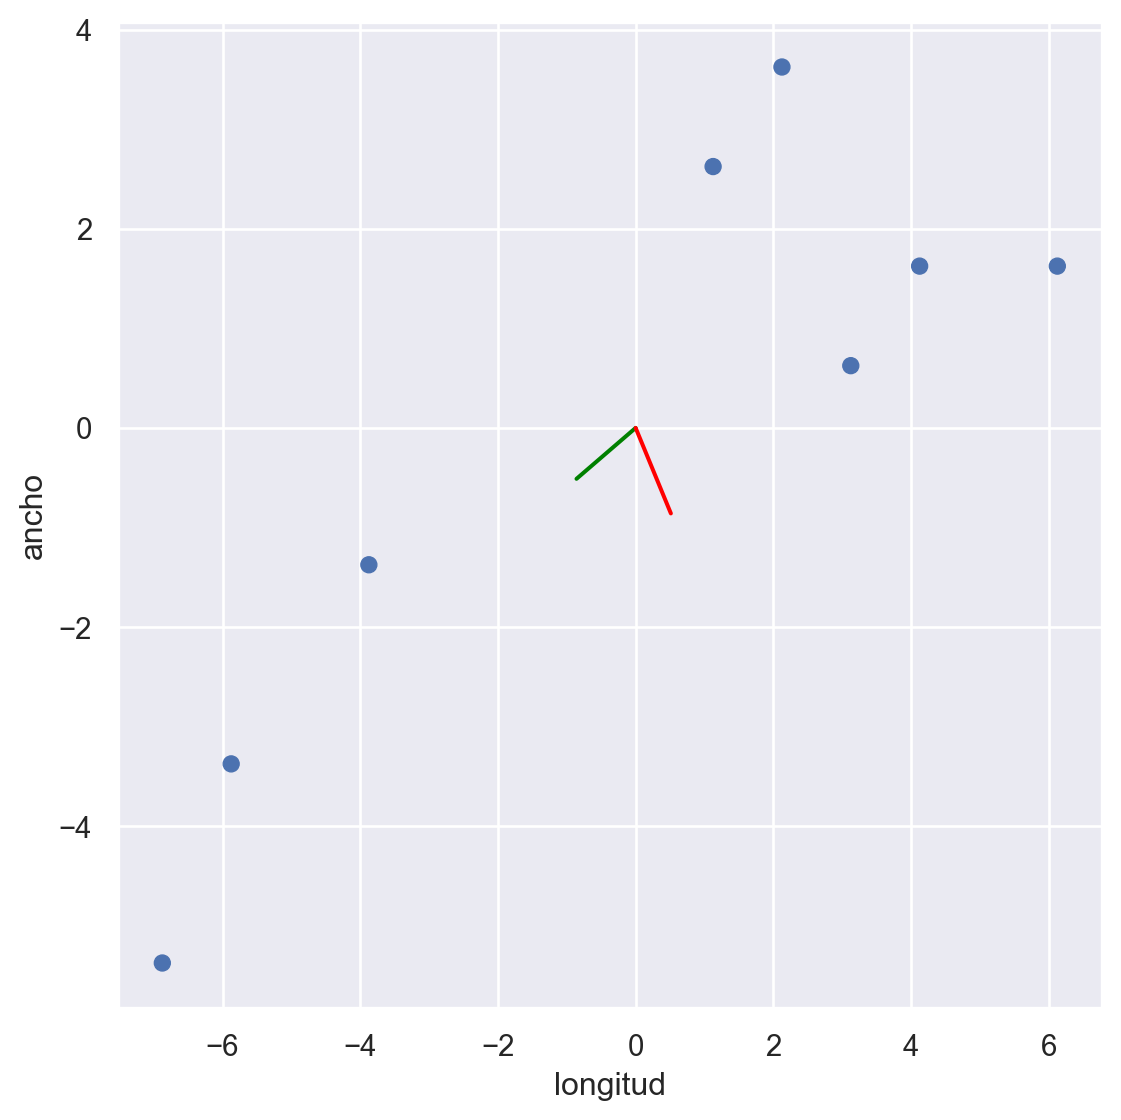

In [7]:
# Graficamos los autovectores
(
    so.Plot()
    .add(so.Dot(), x = starTortugas["longitud"], y = starTortugas["ancho"])
    .add(so.Line(color = "green"), x = [0, U[0,0]], y = [0, U[1,0]]) # Primera dirección principal
    .add(so.Line(color = "red"), x = [0, U[0,1]], y = [0, U[1,1]]) # Segunda dirección principal
    .layout(size = (6,6))
)

### C

In [14]:
# Calculo de Componentes principales

Z = Sigma @ U

Z.columns = ["Z1", "Z2"]

Z

,Z1,Z2
longitud,-23.766199,0.860535
ancho,-14.154724,-1.444863


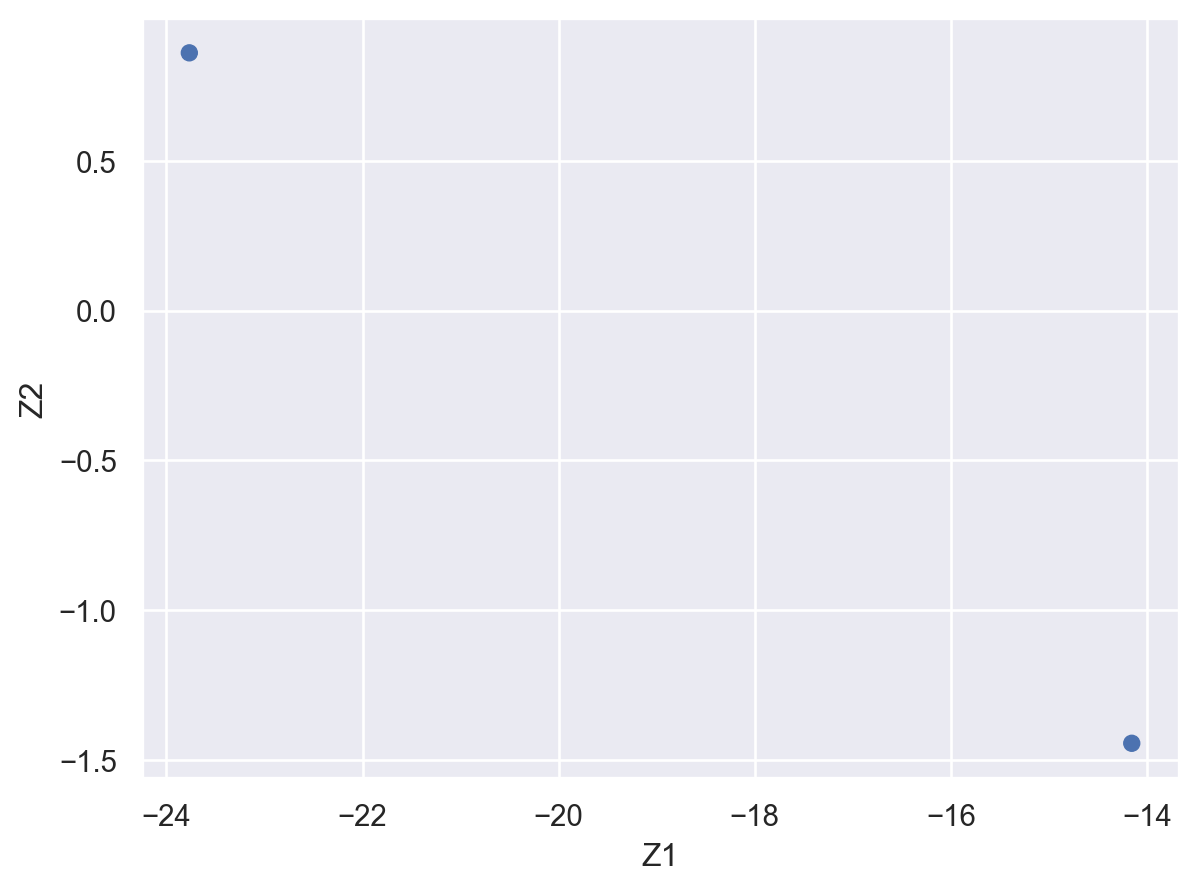

In [11]:
# Graficamos las nuevas variables.
(
    so.Plot(data = Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

Podemos ver como la longitud tiene mucha mas importancia ya que es la primera columna de Z mientras que el ancho es bastante bajo

### d

### e

In [15]:
varianzaTotal = sum(gamma)

porcentajeVarianza = gamma/varianzaTotal

print("Varianza total")

print("Procentaje Varianza", porcentajeVarianza*100)

Varianza total
Procentaje Varianza [ 5.73106735 94.26893265]


Por lo tanto nos importa mucho mas la segunda componente (ancho) y solo vamos a perder un 5% de la informacion si ignoramos la primera (longitud)

## Ejercicio 2

In [24]:
matrizCovarianza = pd.DataFrame({"X1":[3,1,1],"X2":[1,3,1],"X3":[1,1,5]})

matrizCovarianza

,X1,X2,X3
0,3,1,1
1,1,3,1
2,1,1,5


In [25]:
#Calculo de Autovalores
Sigma = matrizCovarianza

# eigh es un comando especial para calcular autovalores y autovectores de matrices simétricas
# Devuelve una dupla:
# - la primer componente es el vector de autovalores, ordenados de menor a mayor
# - la segunda componente es la matriz de autovectores. la i-ésima columna de U es el autovector correspondiente al i-ésimo autovalor
gamma, U = np.linalg.eigh(Sigma) 

#Autovalores
print(gamma)

#Autovectores como columnas
#print(U)

#Autovectores en Filas
#Autovector 1 = [0,0] y [1,0]
#Autovector 2 = [0,1] y [1,1]
U = np.flip(U, 1)

print(U)

[2. 3. 6.]
[[ 4.08248290e-01  5.77350269e-01  7.07106781e-01]
 [ 4.08248290e-01  5.77350269e-01 -7.07106781e-01]
 [ 8.16496581e-01 -5.77350269e-01 -4.67292701e-18]]


### b

In [26]:
Z = Sigma @ U

Z.columns = ["Z1", "Z2","Z3"]

Z

,Z1,Z2,Z3
0,2.449490,1.732051,1.414214e+00
1,2.449490,1.732051,-1.414214e+00
2,4.898979,-1.732051,-1.343869e-16


In [23]:
varianzaTotal = sum(gamma)

porcentajeVarianza = gamma/varianzaTotal

print("Varianza total")

print("Procentaje Varianza", porcentajeVarianza*100)

Varianza total
Procentaje Varianza [18.18181818 27.27272727 54.54545455]


### c

In [ ]:
# Como?
#Leer Componentes Principales me esta confundiendo

## Ejercicio 3

In [71]:
def componentesNecesarios(data, p_acum):    
    matrizCovarianza = np.cov(data.transpose(), bias = 1)
    
    #Calculo de Autovalores y Autovectores
    gamma, U = np.linalg.eigh(matrizCovarianza) 

    #Autovectores en Filas
    #Autovector 1 = [0,0] y [1,0]
    #Autovector 2 = [0,1] y [1,1]
    U = np.flip(U, 1)
    
    #Calculo de la varianza
    varianzaTotal = sum(gamma)

    porcentajeVarianza = gamma/varianzaTotal

    #Lo ordeno de mayor a menor
    porcentajeVarianza = sorted(porcentajeVarianza, reverse=True)
    print(porcentajeVarianza)
    
    porcentajeAcumulado = 0
    cantidadElementos = 0
    
    #Loopeo hasta quie la probabilidad pase p_acum
    for varianza in porcentajeVarianza:
        porcentajeAcumulado += varianza
        cantidadElementos += 1
        
        if porcentajeAcumulado > p_acum:
            break
    
    return cantidadElementos

In [44]:
data = sns.load_dataset("penguins").dropna().reset_index(drop=True)

data = data.drop("species",axis=1).drop("island",axis=1).drop("sex",axis=1)

componentesNecesarios(data,0.8)

[2.35377792e+00 1.61064684e+01 5.05834527e+01 6.46585914e+05]


1

## Ejercicio 4

### a

In [61]:
data = pd.read_csv("../../Datasets/p8-chalets.csv", index_col="Promotora")

data



,DuracionHipoteca,PrecioMedio,SuperficieCocina
Promotora,,,
1,8.7,0.3,3.1
2,14.3,0.9,7.4
3,18.9,1.8,9.0
4,19.0,0.8,9.4
5,20.5,0.9,8.3
6,14.7,1.1,7.6
7,18.8,2.5,12.6
8,37.3,2.7,18.1
9,12.6,1.3,5.9


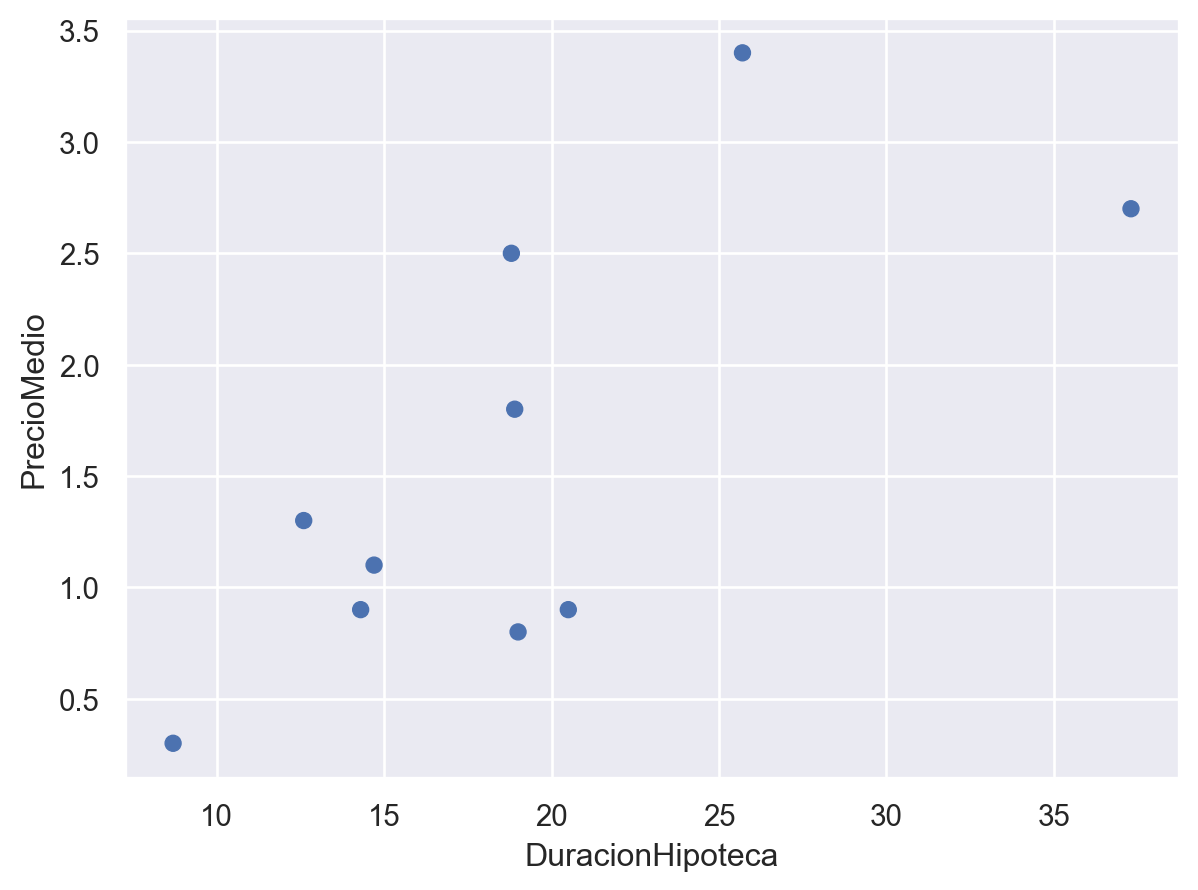

In [62]:
so.Plot(data=data, x="DuracionHipoteca",y="PrecioMedio").add(so.Dot())

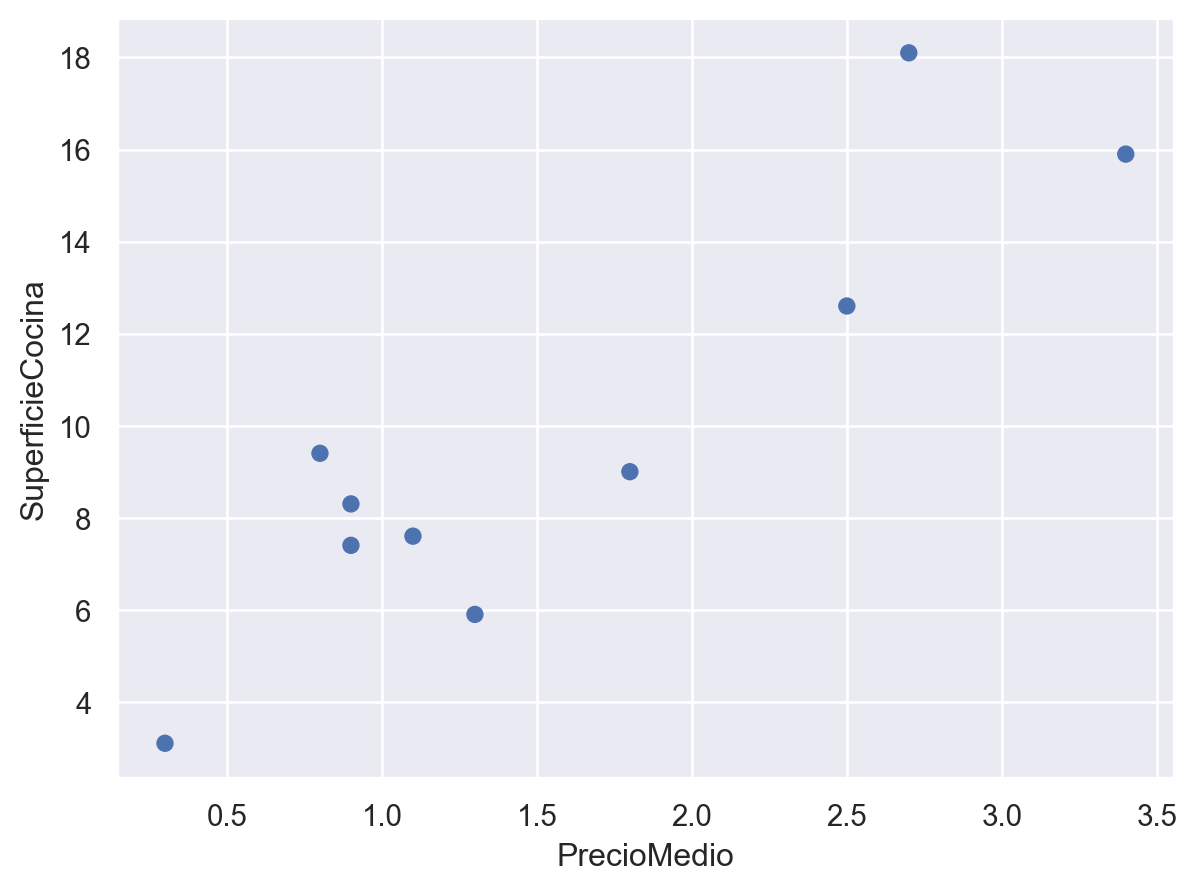

In [63]:
so.Plot(data=data, x="PrecioMedio",y="SuperficieCocina").add(so.Dot())

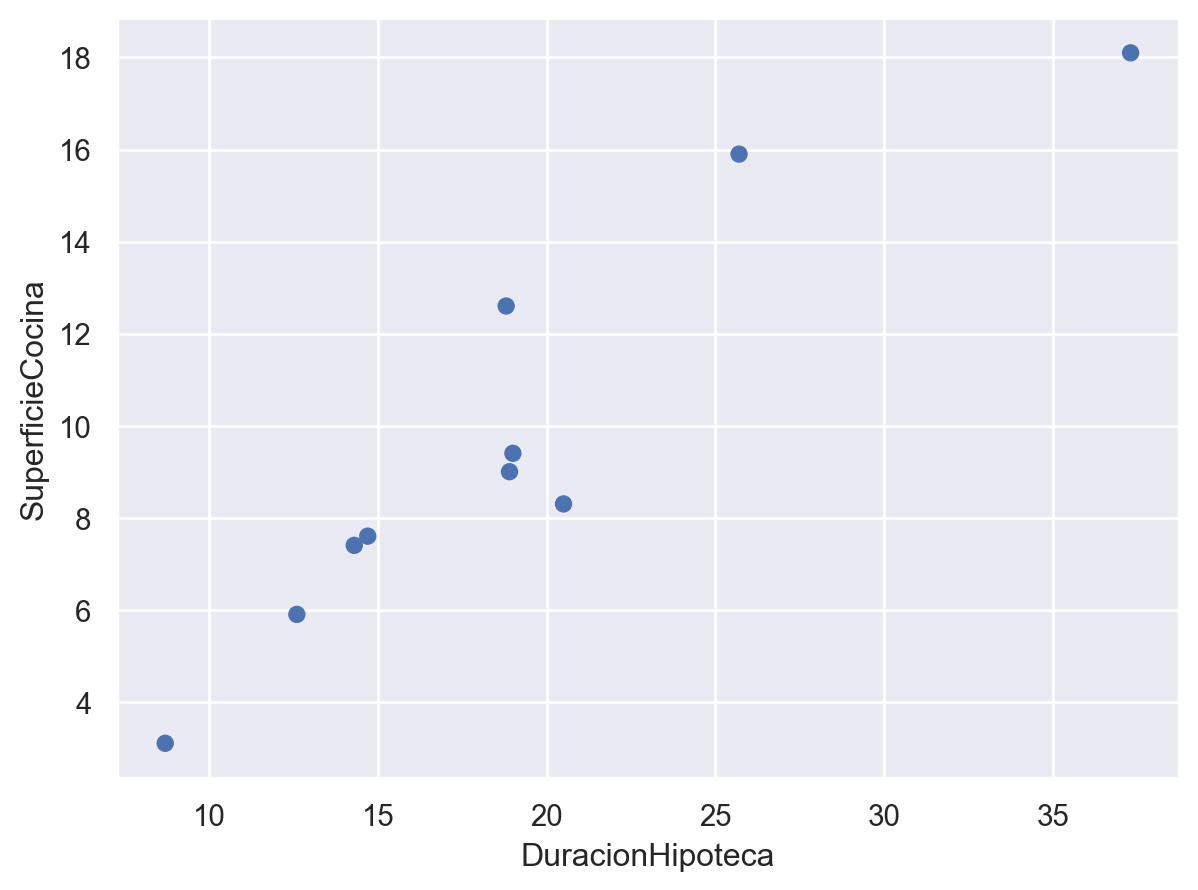

In [64]:
so.Plot(data=data, x="DuracionHipoteca",y="SuperficieCocina").add(so.Dot())

### b

In [65]:
matrizCovarianza = np.cov(data.transpose(), bias = 1)

matrizCovarianza

array([[56.9685,  5.1705, 30.4775],
       [ 5.1705,  0.8941,  3.6479],
       [30.4775,  3.6479, 18.7641]])

### c

No se como plantearlo asi que ni idea

### d

In [66]:
#Calculo Autovectores y Autovalores 

gamma, U = np.linalg.eigh(matrizCovarianza) 
U = np.flip(U, 1)

#Tomo el ultimo autovector que corresponde al de mayor autovalor, por lo tanto es el primero
primerAutovector = U[len(U)-1,:]

primerCompPrincipal = primerAutovector.transpose() @ matrizCovarianza @ primerAutovector

primerCompPrincipal

3.909672315242415

### e

Ni idea me falta teoria

## Ejercicio 5

In [67]:
data = pd.read_csv("../../Datasets/p8-iris.txt", sep="\t")

data

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


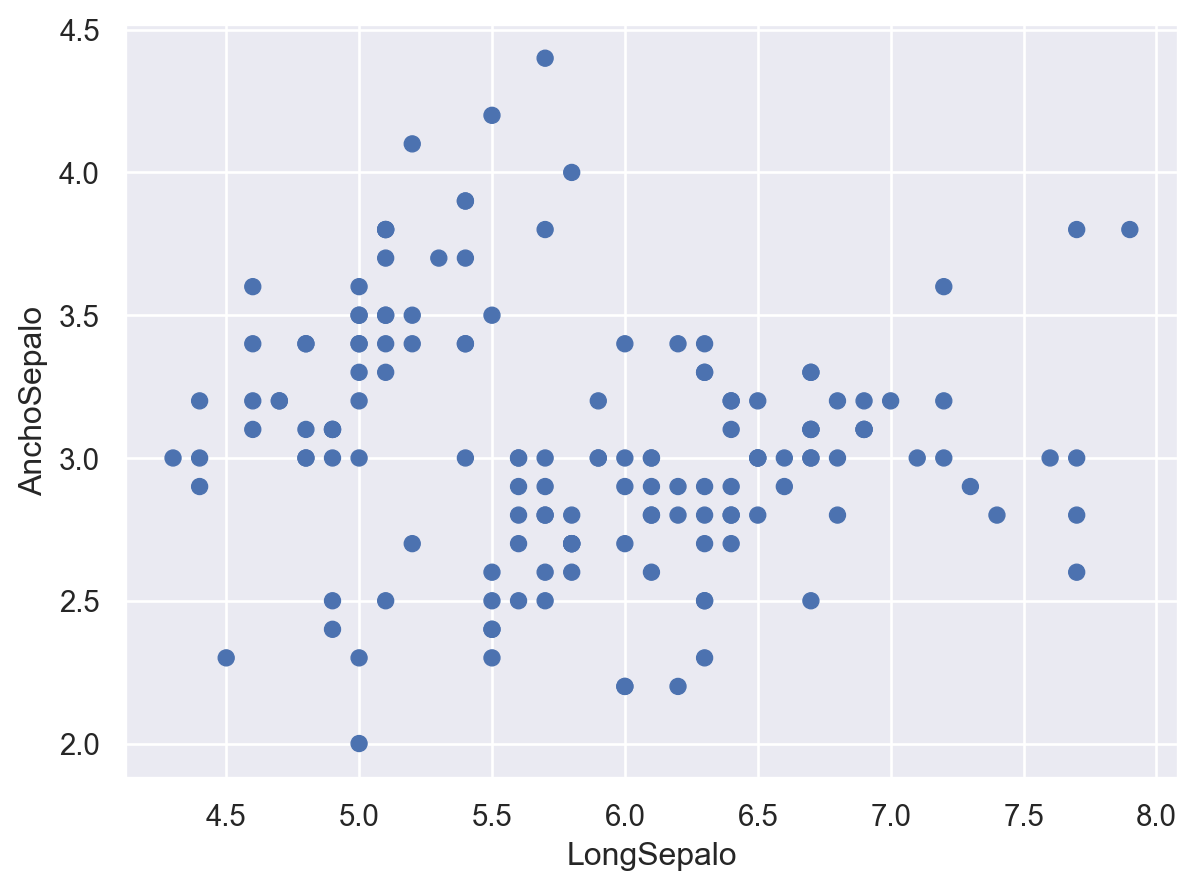

In [68]:
so.Plot(data=data, x="LongSepalo",y="AnchoSepalo").add(so.Dot())

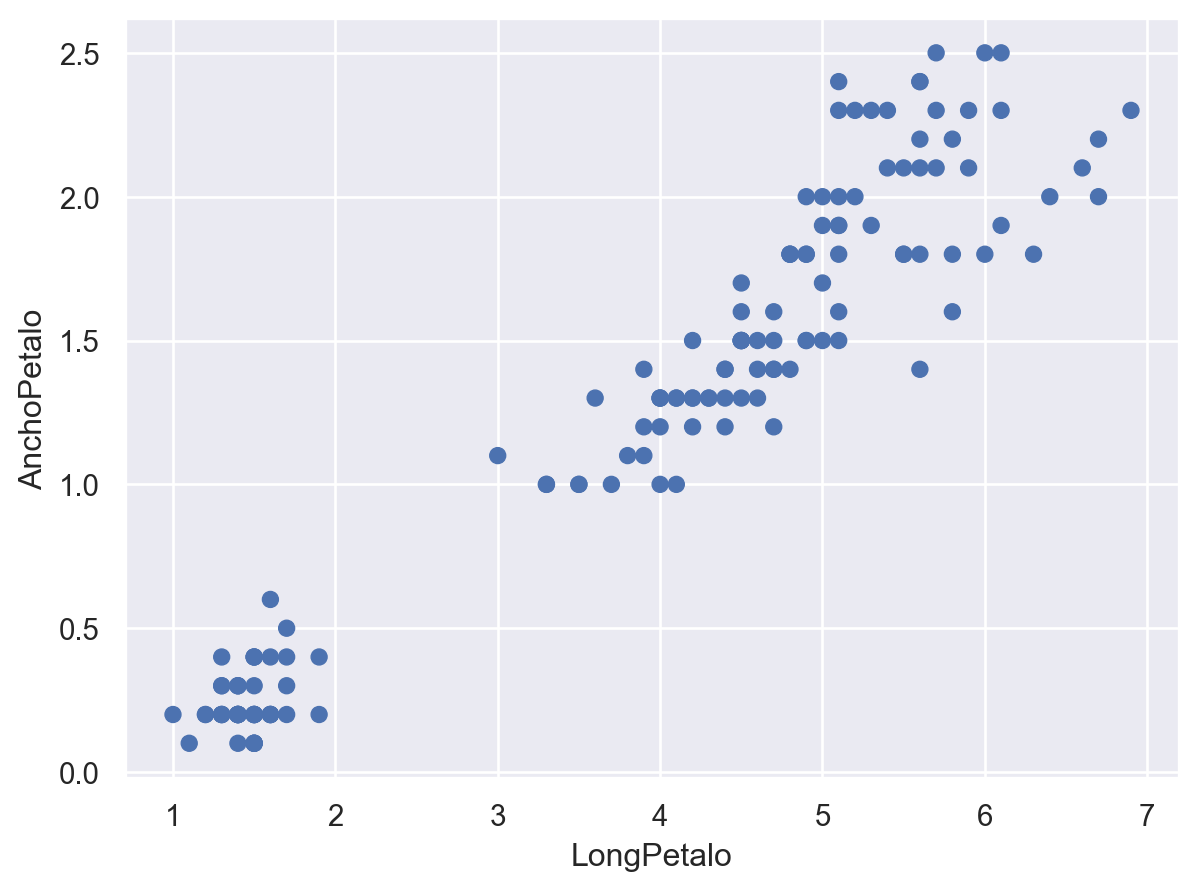

In [69]:
so.Plot(data=data, x="LongPetalo",y="AnchoPetalo").add(so.Dot())

In [72]:
componentesNecesarios(data, 0.9)

[0.9246162071742682, 0.05301556785053517, 0.017185139525006752, 0.005183085450189802]


1

Me falta data de como funcionan los componentes para ver que tengo que reducir, falta leer